In [10]:
import sys
sys.path.append('..')

from Helpers.Helpers import *

In [11]:

#lrest = ca.SX([0.09, 0.04, 0.06, 0.1, 0.19, 0.14])
#Fmax = ca.SX([1142, 260, 987, 624, 430, 798])
#vmax = 6.28*lrest

def Todorov_fl(l):
    return np.exp(-np.abs((l**1.92-1)/1.03)**1.87)

def Todorov_fv(l,v):
    if v <= 0 : return (-5.72-v)/(-5.72+(1.38+2.09*l)*v)
    else : return (0.62-(-3.12+4.21*l-2.67*l*l)*v)/(0.62+v)

def Nf(l):
    return 2.11+4.16*(1/l-1)
def Todorov_A(a,l):
    return 1-np.exp(-(a/(0.56*Nf(l)))**Nf(l))
def Todorov_fp(l):
    return np.min(-0.02*np.exp(13.8-18.7*l),0)+67.1*0.056*np.log(np.exp((l-1.41)/0.056)+1)



def origin_fast_fl(l):
    return np.exp(-np.abs((l**1.55-1)/.81)**2.12)

def origin_fast_fv(l,v):
    if v <=0 : return (-7.39-v)/(-7.39-3.21*v+4.17*l*v)
    if v >= 0: return (1.05-(-1.53*v))/(1.05+v)

def origin_fast_fp(l) : 
    return min(-0.02*np.exp(-18.7*(l-0.79))+0.02,0)+69.6*0.058*np.log(np.exp((l-1.5)/0.0598)+1)




def origin_slow_fp(l) : 
    return min(-0.02*np.exp(-18.7*(l-0.79))+0.02,0)+67.1*0.056*np.log(np.exp((l-1.41)/0.056)+1)

def origin_slow_fl(l):
    return np.exp(-(np.abs((l**2.3-1)/1.26)**1.62))

def origin_slow_fv(l,v):
    if v <=0 : return (-4.06-v)/(-4.06+5.88*v)
    if v > 0: return (0.18-(-4.7+8.34*l-5.34*l*l)*v)/(0.18+v)



# Functions
def my_fl(l_normalized):
    return np.exp(-((l_normalized-1) / 0.5) ** 2)

def my_fv(v_normalized):
    vmax = -0.628
    return (vmax - v_normalized) / (vmax + 0.3 * v_normalized)
def my_fv2(v):
    if v <= 0 : return (-5.72-v)/(-5.72+(1.38+2.09)*v)
    else : return (0.62-(-3.12+4.21-2.67)*v)/(0.62+v)

# Generate data

# Generate data
#l_values = np.linspace(0.7, 1.3, 100)
#v_values = np.linspace(-2, 2, 100)
#L, V = np.meshgrid(l_values, v_values)
#Z = np.zeros((100,100))
#for i in range(100):
#    for j in range(100):
#        Z[i,j] = my_fl(L[i,j]) * my_fv(L[i,j]) 
#
## Plotting
#fig = plt.figure(figsize=(10, 7))
#ax = fig.add_subplot(111, projection='3d')
#
#ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)
#
## Labels and title
#ax.set_xlabel('l_normalized')
#ax.set_ylabel('v_normalized')
#ax.set_zlabel('fl(l) * fv(v)')
#ax.set_title('My 3D plot')
#ax.invert_xaxis()
#
#plt.show()


$\tau = MT(l(\theta),v(\dot{\theta}))$

where 

$l(\theta) = l_0+M(\theta-\theta_0)$

$v(\dot{\theta}) = M\dot{\theta}$

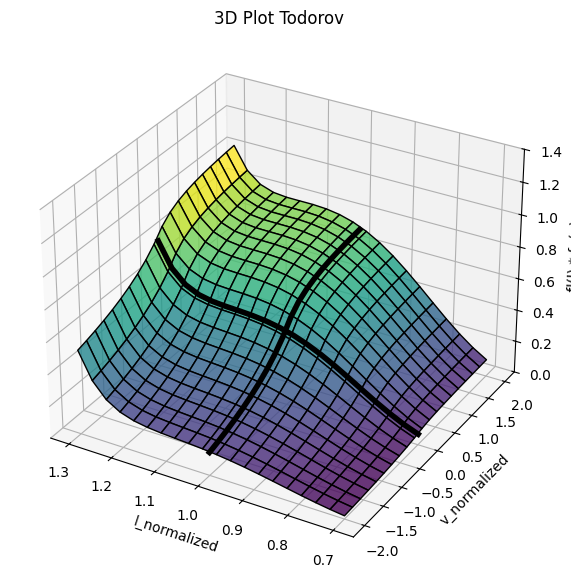

In [12]:
def Todorov_modified_fl(l):
    return np.exp(-(l**1.92-1)/1.03**2)

def Todorov_modified_fv(v):
    if v <= 0 : return (-5.72-v)/(-5.72+3.47*v)
    else : return (0.62-(-1.58)*v)/(0.62+v)

def Nf(l):
    return 2.11+4.16*(1/l-1)
def Todorov_modified_A(a,l):
    return 1-np.exp(-(a/(0.56*Nf(l)))**Nf(l))
def Todorov_modified_fp(l):
    return -0.02*np.exp(13.8-18.7*l)+67.1*0.056*np.log(np.exp((l-1.41)/0.056)+1)


l_values = np.linspace(0.7, 1.3, 20)
v_values = np.linspace(-2, 2, 20)
L, V = np.meshgrid(l_values, v_values)
Z = np.zeros((20,20))
j_index= 9

for i in range(20):
    for j in range(20):
        Z[j,i] = Todorov_modified_A(1,l_values[i])*(Todorov_modified_fl(l_values[i]) * Todorov_modified_fv(v_values[j]) + Todorov_modified_fp(l_values[i]))

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(
    np.full_like(v_values, 1),  # x-values fixed at 1
    v_values,  # y-values (from v_values)
    Z[:,j_index],  # Corresponding Z-values
    color='black',
    linewidth=4,zorder = 10  # Increase linewidth for boldness
)

ax.plot3D(
    l_values,  # x-values fixed at 1
    np.full_like(v_values, 0),  # y-values (from v_values)
    Z[j_index,:],  # Corresponding Z-values
    color='black',
    linewidth=4,zorder = 10  # Increase linewidth for boldness
)
ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels and title
ax.set_xlabel('l_normalized')
ax.set_ylabel('v_normalized')
ax.set_zlabel('fl(l) * fv(v)')
ax.set_title('3D Plot Todorov')
ax.invert_xaxis()
ax.set_zlim(0,1.4)
plt.show()

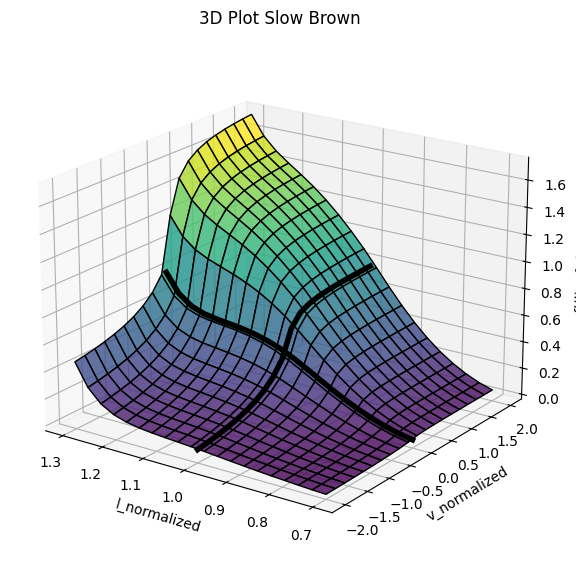

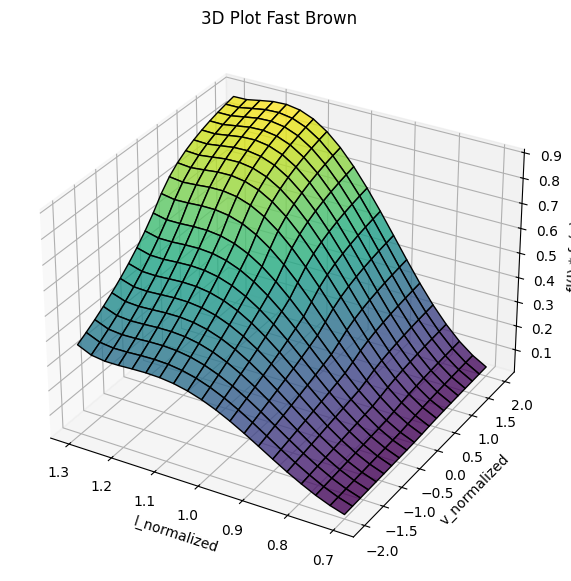

In [14]:
# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
l_values = np.linspace(0.7, 1.3, 20)
v_values = np.linspace(-2, 2, 20)
L, V = np.meshgrid(l_values, v_values)
Z = np.zeros((20,20))
for i in range(20):
    for j in range(20):
        Z[j,i] = Todorov_A(1,l_values[i])*(origin_slow_fl(l_values[i]) * origin_slow_fv(l_values[i],v_values[j]) + origin_slow_fp(l_values[i]))


ax.plot_surface(L,V, Z, cmap='viridis', edgecolor='k', alpha=0.8)

j_index = 9 # Find the closest index

ax.plot3D(
    np.full_like(v_values, 1),  # x-values fixed at 1
    v_values,  # y-values (from v_values)
    Z[:,j_index],  # Corresponding Z-values
    color='black',
    linewidth=4,zorder = 10  # Increase linewidth for boldness
)

ax.plot3D(
    l_values,  # x-values fixed at 1
    np.full_like(v_values, 0),  # y-values (from v_values)
    Z[j_index,:],  # Corresponding Z-values
    color='black',
    linewidth=4,zorder = 10  # Increase linewidth for boldness
)
# Labels and title
ax.set_xlabel('l_normalized')
ax.set_ylabel('v_normalized')
ax.set_zlabel('fl(l) * fv(v)')
ax.set_title('3D Plot Slow Brown')

ax.invert_xaxis()
ax.view_init(elev=20, azim=-55)
plt.show()
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i in range(20):
    for j in range(20):
        Z[j,i] = Todorov_A(1,l_values[i])*(origin_fast_fl(l_values[i]) * origin_fast_fv(l_values[i],v_values[j]) + origin_fast_fp(l_values[i]))


ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels and title
ax.set_xlabel('l_normalized')
ax.set_ylabel('v_normalized')
ax.set_zlabel('fl(l) * fv(v)')
ax.set_title('3D Plot Fast Brown')
ax.invert_xaxis()

plt.show()

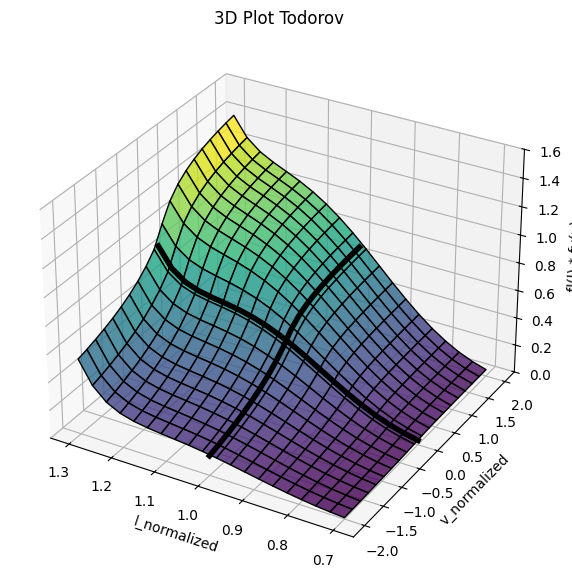

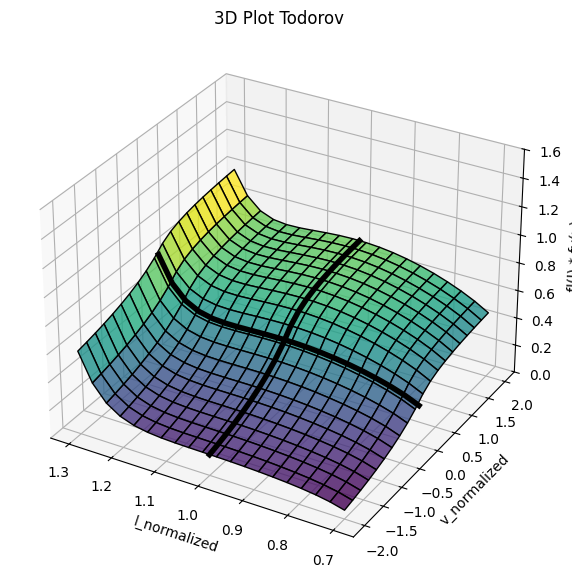

In [28]:


for i in range(20):
    for j in range(20):
        Z[j,i] = Todorov_A(1,l_values[i])*(Todorov_fl(l_values[i]) * Todorov_fv(l_values[i],v_values[j]) + Todorov_fp(l_values[i]))

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(
    np.full_like(v_values, 1),  # x-values fixed at 1
    v_values,  # y-values (from v_values)
    Z[:,j_index],  # Corresponding Z-values
    color='black',
    linewidth=4,zorder = 10  # Increase linewidth for boldness
)
ax.set_zlim(0,1.6)
ax.plot3D(
    l_values,  # x-values fixed at 1
    np.full_like(v_values, 0),  # y-values (from v_values)
    Z[j_index,:],  # Corresponding Z-values
    color='black',
    linewidth=4,zorder = 10  # Increase linewidth for boldness
)
ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels and title
ax.set_xlabel('l_normalized')
ax.set_ylabel('v_normalized')
ax.set_zlabel('fl(l) * fv(v)')
ax.set_title('3D Plot Todorov')
ax.invert_xaxis()

plt.show()
l_values = np.linspace(0.7, 1.3, 20)
v_values = np.linspace(-2, 2, 20)


def myNf(l):
    return 2.11 + 4.16 * (1 / l - 1)

def myTodorov_A(a,l):
    return 1-np.exp(-(a/(0.56*2.11))**2.11)

for i in range(20):
    for j in range(20):
        Z[j,i] = myTodorov_A(1,l_values[i])*my_fl(l_values[i]) * my_fv2(v_values[j])+ Todorov_fp(l_values[i])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(
    np.full_like(v_values, 1),  # x-values fixed at 1
    v_values,  # y-values (from v_values)
    Z[:,j_index],  # Corresponding Z-values
    color='black',
    linewidth=4,zorder = 10  # Increase linewidth for boldness
)

ax.plot3D(
    l_values,  # x-values fixed at 1
    np.full_like(v_values, 0),  # y-values (from v_values)
    Z[j_index,:],  # Corresponding Z-values
    color='black',
    linewidth=4,zorder = 10  # Increase linewidth for boldness
)
ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)
ax.set_zlim(0,1.6)
# Labels and title
ax.set_xlabel('l_normalized')
ax.set_ylabel('v_normalized')
ax.set_zlabel('fl(l) * fv(v)')
ax.set_title('3D Plot Todorov')
ax.invert_xaxis()

plt.show()